In [110]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('data/chips.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       118 non-null    float64
 1   y       118 non-null    float64
 2   class   118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [112]:
df.describe()

,x,y,class
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


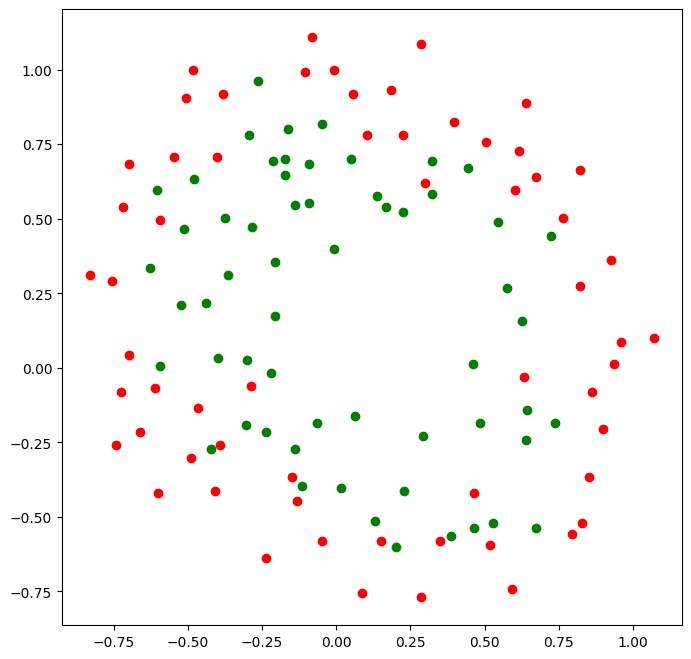

In [113]:
zero = df[(df['class'] == 0)]
one = df[(df['class'] == 1)]

plt.rcParams['figure.figsize'] = (8, 8)

plt.plot(zero.x, zero.y, 'ro')
plt.plot(one.x, one.y, 'go')
plt.show()

# Дерево

### Постройте дерево принятия решений

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

target_attr = 'class'

train, test = train_test_split(df, test_size=0.2)
train_attrs, train_target = train.drop(target_attr, axis=1), train[target_attr]
test_attrs, test_target = test.drop(target_attr, axis=1), test[target_attr]


DT = DecisionTreeClassifier()
DT.fit(train_attrs, train_target)
predict = DT.predict(test_attrs)

print('Accuracy score:', metrics.accuracy_score(test_target, predict))

Accuracy score: 0.5833333333333334


### Визуализируйте полученное дерево

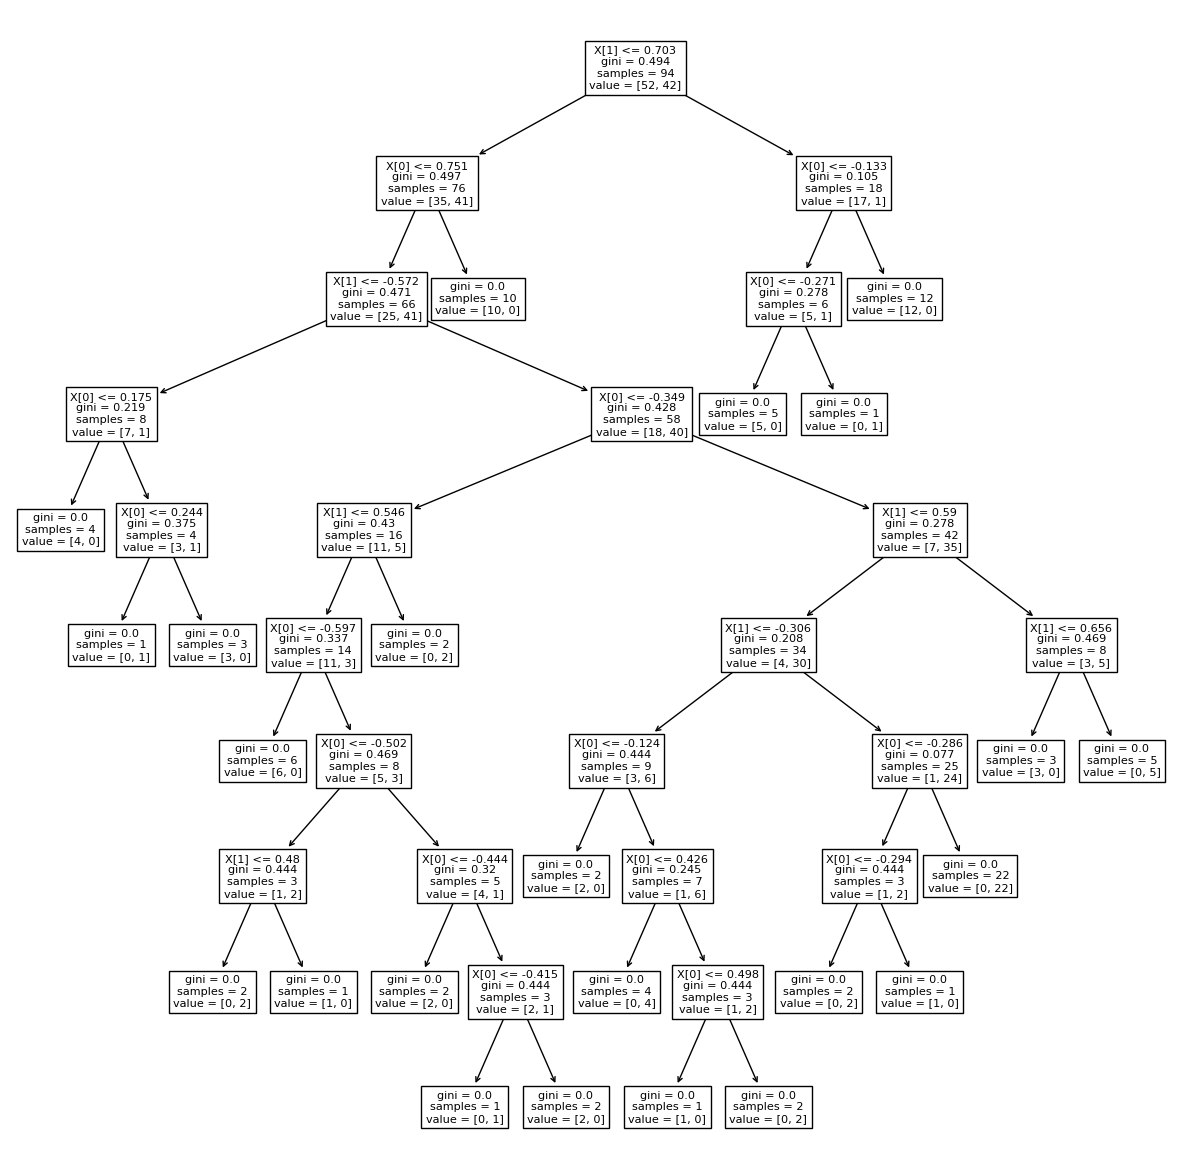

In [115]:
from sklearn.tree import plot_tree

plt.rcParams['figure.figsize'] = (15, 15)

plot_tree(DT)
plt.show()

### Постройте график зависимости качества классификации от глубины дерева принятия решений на тестовой и тренировочной части набора данных

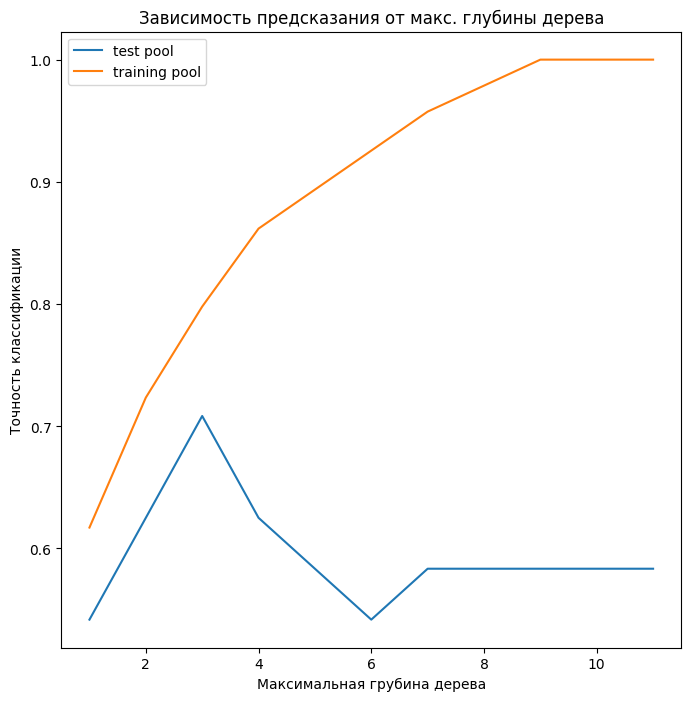

In [116]:
xs = range(1, 12)

test_accuracy = []
train_accuracy = []

for depth in xs:
  model = DecisionTreeClassifier(max_depth=depth).fit(train_attrs, train_target)

  predict = model.predict(test_attrs)
  test_accuracy.append(metrics.accuracy_score(test_target, predict))

  predict = model.predict(train_attrs)
  train_accuracy.append(metrics.accuracy_score(train_target, predict))


plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(xs, test_accuracy, label='test pool')
plt.plot(xs, train_accuracy, label='training pool')
plt.title("Зависимость предсказания от макс. глубины дерева")
plt.xlabel("Максимальная грубина дерева")
plt.ylabel("Точность классификации")
plt.legend()
plt.show()

# Случайный лес

### Постройте график зависимости качества классификации от числа деревьев на тестовой и тренировочной части набора данных.


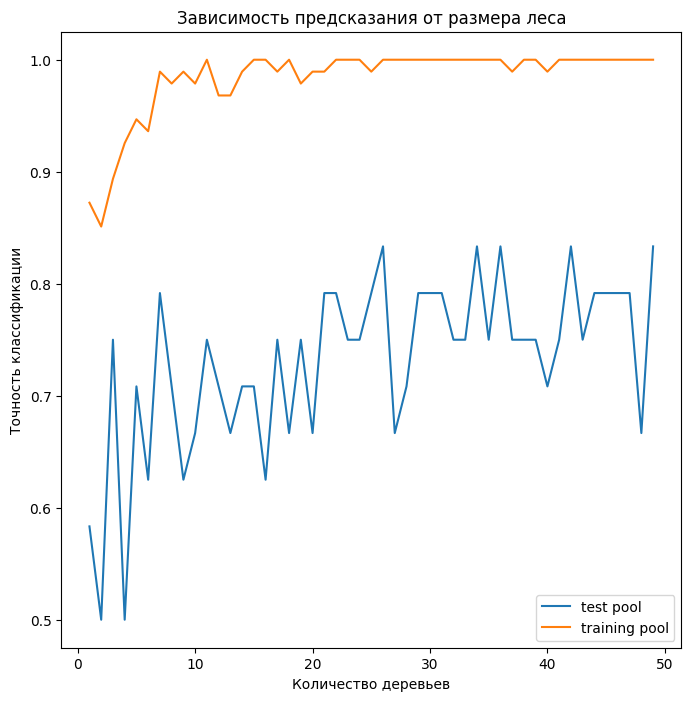

In [117]:
from sklearn.ensemble import RandomForestClassifier

test_accuracy = []
train_accuracy = []
xs = range(1, 50)

for trees in xs:
  model = RandomForestClassifier(n_estimators=trees).fit(train_attrs, train_target)

  predict = model.predict(test_attrs)
  test_accuracy.append(metrics.accuracy_score(test_target, predict))

  predict = model.predict(train_attrs)
  train_accuracy.append(metrics.accuracy_score(train_target, predict))

plt.plot(xs, test_accuracy, label='test pool')
plt.plot(xs, train_accuracy, label='training pool')
plt.title("Зависимость предсказания от размера леса")
plt.xlabel("Количество деревьев")
plt.ylabel("Точность классификации")
plt.legend()
plt.show()

### Визуализируйте, как всё пространство классифицируется алгоритмом для разного числа деревьев

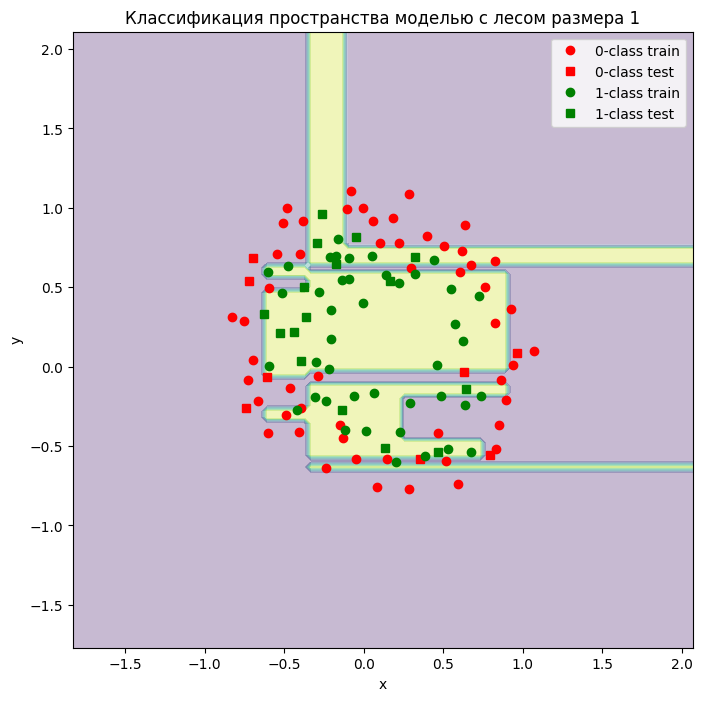

Размер леса:  1 
Точность:  0.864406779661017


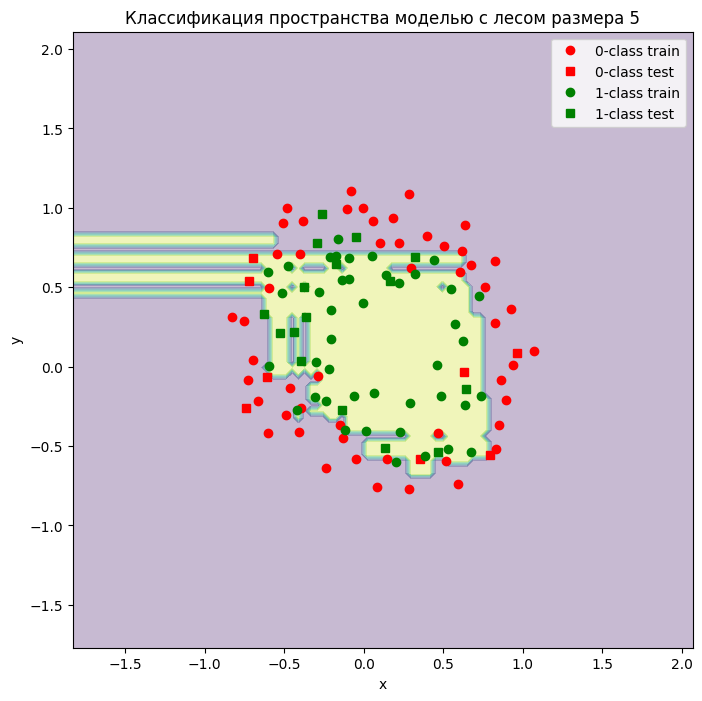

Размер леса:  5 
Точность:  0.8813559322033898


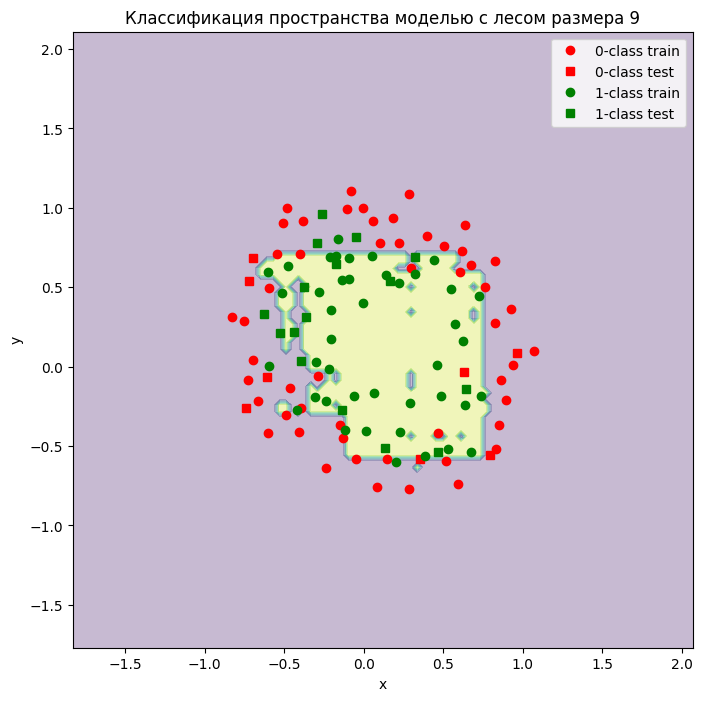

Размер леса:  9 
Точность:  0.9067796610169492


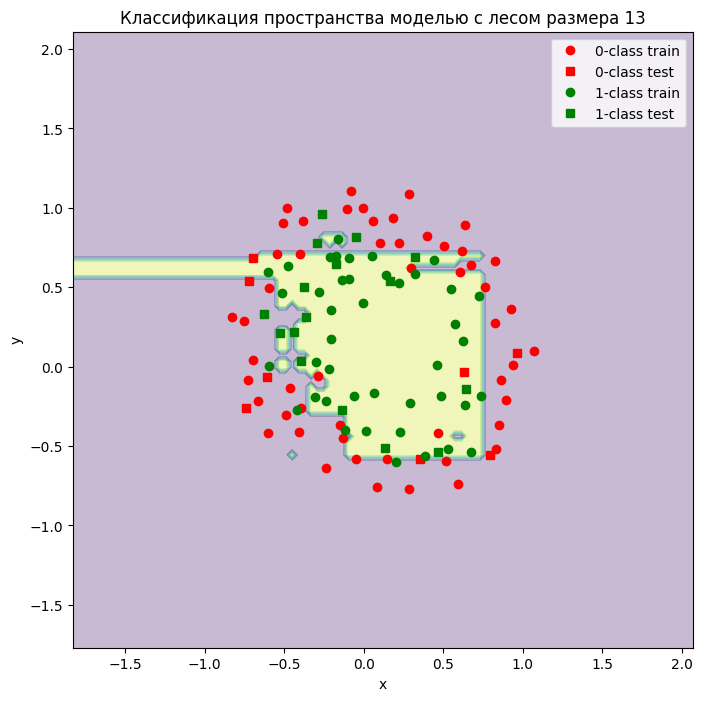

Размер леса:  13 
Точность:  0.923728813559322


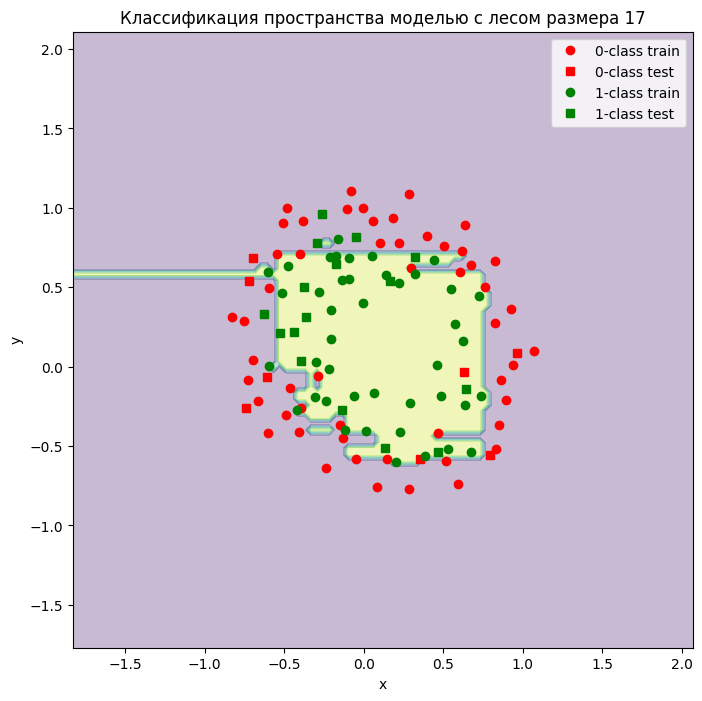

Размер леса:  17 
Точность:  0.9491525423728814


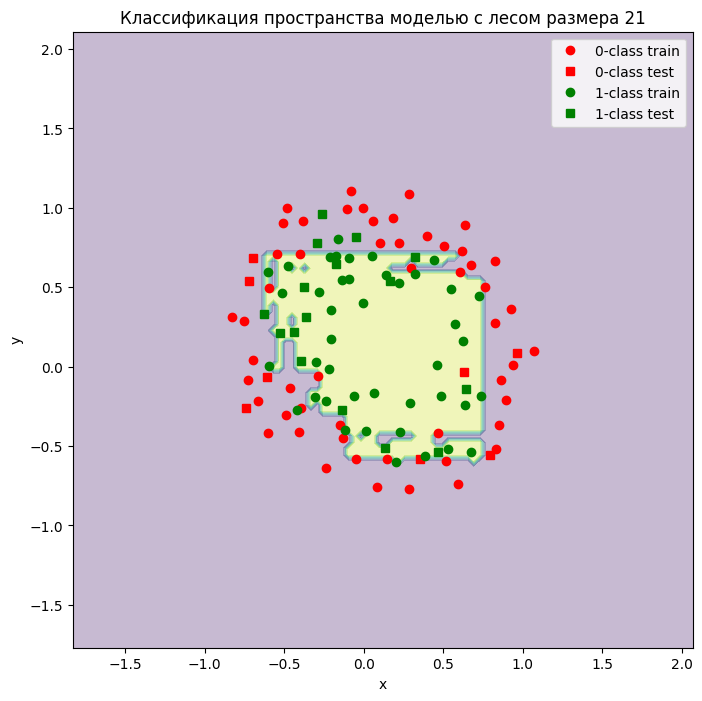

Размер леса:  21 
Точность:  0.9661016949152542


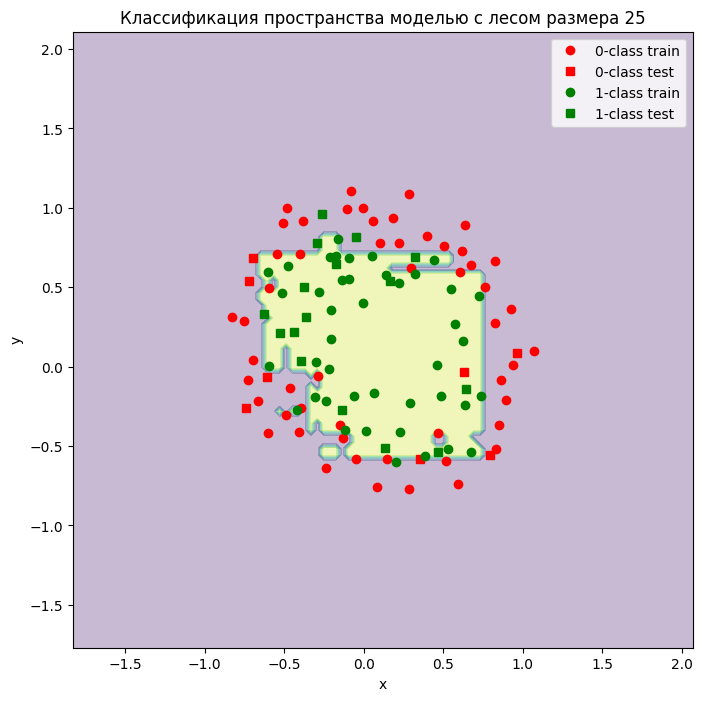

Размер леса:  25 
Точность:  0.9661016949152542


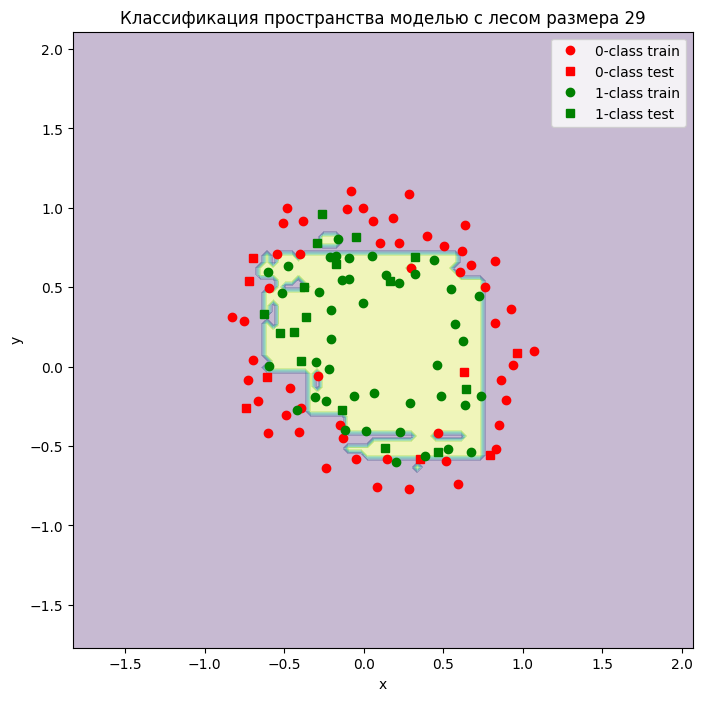

Размер леса:  29 
Точность:  0.9491525423728814


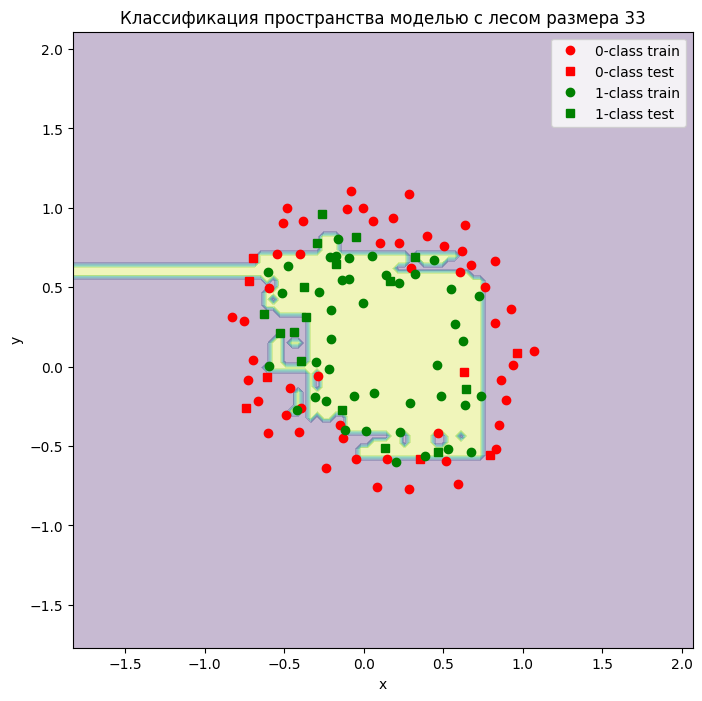

Размер леса:  33 
Точность:  0.940677966101695


In [154]:
from sklearn.inspection import DecisionBoundaryDisplay

zero_test = test[(test['class'] == 0)]
one_test = test[(test['class'] == 1)]
zero_train = train[(train['class'] == 0)]
one_train = train[(train['class'] == 1)]

df_attr = df.drop(target_attr, axis=1)
df_target = df[target_attr]

for trees in range(1, 35, 4):
  model = RandomForestClassifier(n_estimators=trees).fit(train_attrs, train_target)
  
  display = DecisionBoundaryDisplay.from_estimator(model, df_attr, response_method='predict', alpha=0.3)
  plt.plot(zero_train['x'], zero_train['y'], 'ro', label='0-class train')
  plt.plot(zero_test['x'], zero_test['y'], 'rs', label='0-class test')
  plt.plot(one_train['x'], one_train['y'], 'go', label='1-class train')
  plt.plot(one_test['x'], one_test['y'], 'gs', label='1-class test')
  plt.title('Классификация пространства моделью с лесом размера ' + str(trees))
  plt.legend()
  plt.show()

  predict = model.predict(df_attr)
  print('Размер леса: ', trees, '\nТочность: ', metrics.accuracy_score(df_target, predict))

# Бустинг

### Постройте график зависимости качества классификации от числа деревьев на тестовой и тренировочной части набора данных.


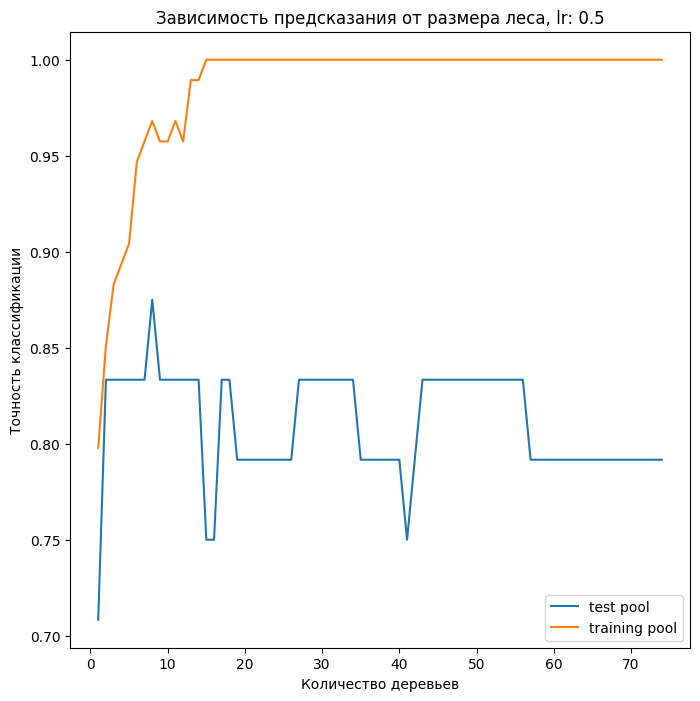

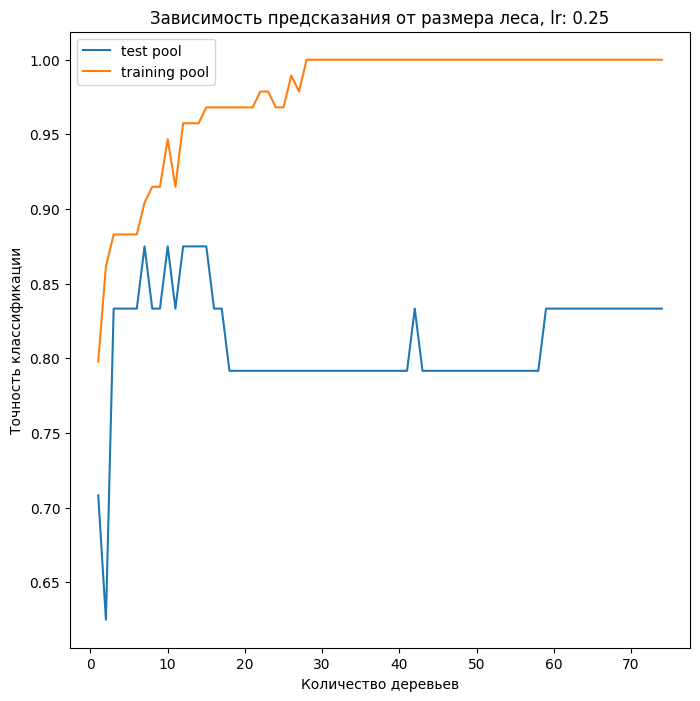

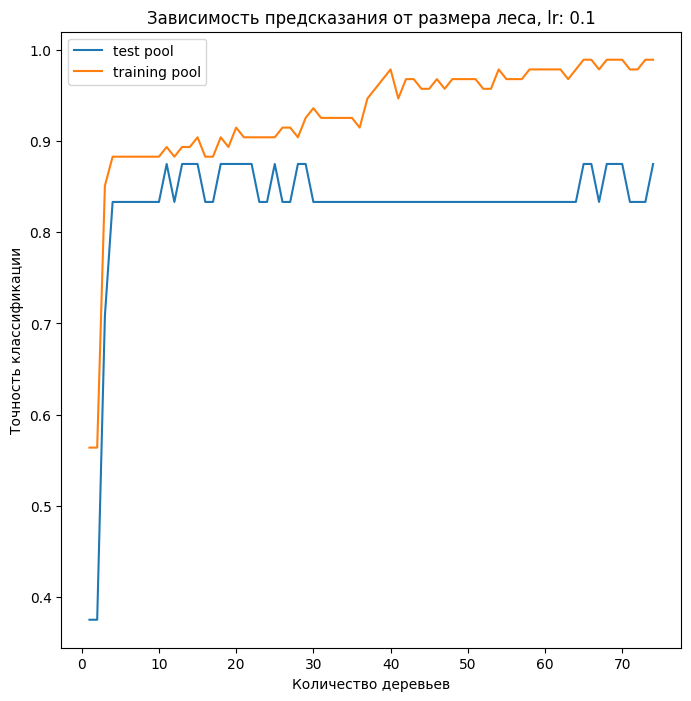

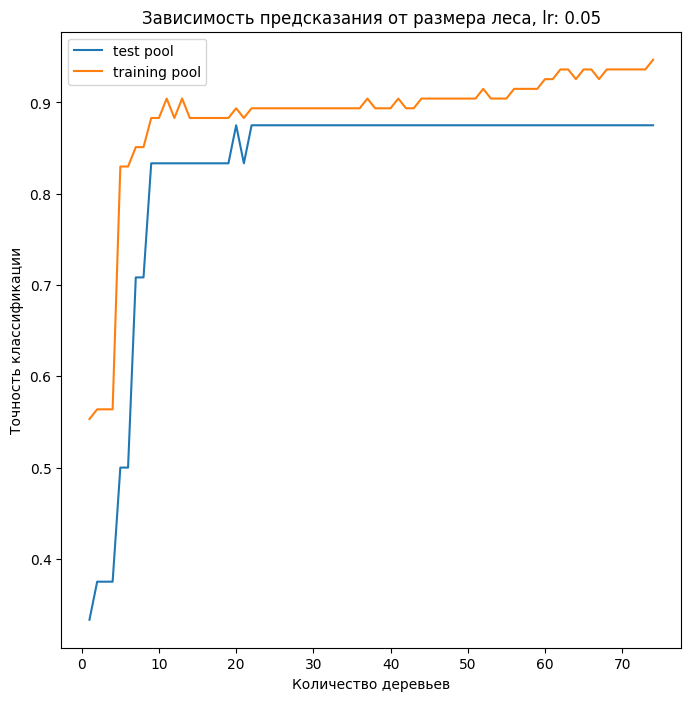

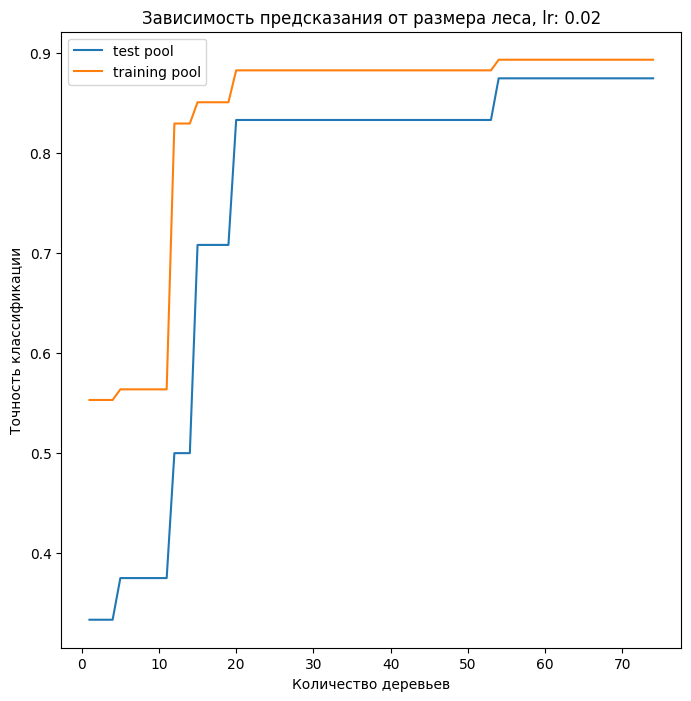

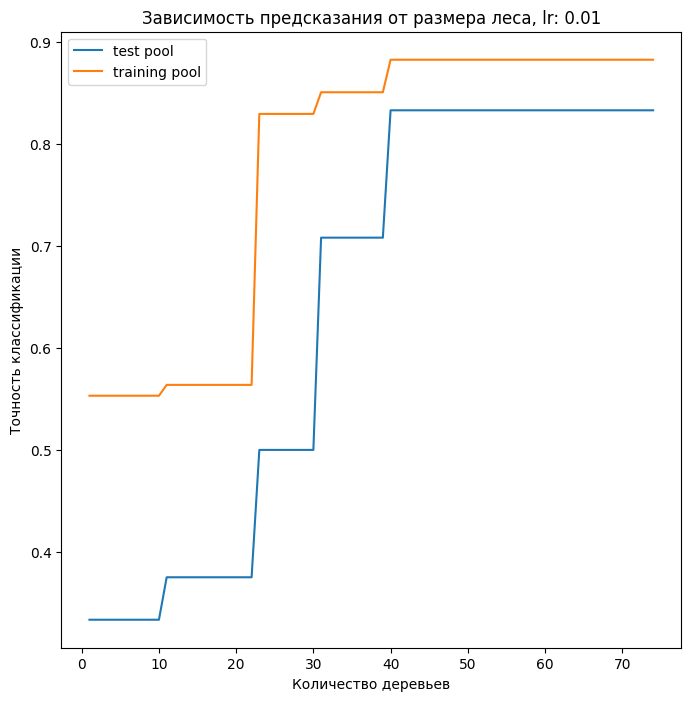

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

for lr in [0.5, 0.25, 0.1, 0.05, 0.02, 0.01]:
  test_accuracy = []
  train_accuracy = []
  xs = range(1, 75)

  for trees in xs:
    model = GradientBoostingClassifier(n_estimators=trees, learning_rate=lr).fit(train_attrs, train_target)

    predict = model.predict(test_attrs)
    test_accuracy.append(metrics.accuracy_score(test_target, predict))

    predict = model.predict(train_attrs)
    train_accuracy.append(metrics.accuracy_score(train_target, predict))

  plt.plot(xs, test_accuracy, label='test pool')
  plt.plot(xs, train_accuracy, label='training pool')
  plt.title("Зависимость предсказания от размера леса, lr: " + str(lr))
  plt.xlabel("Количество деревьев")
  plt.ylabel("Точность классификации")
  plt.legend()
  plt.show()

### Визуализируйте, как всё пространство классифицируется алгоритмом для разного числа деревьев

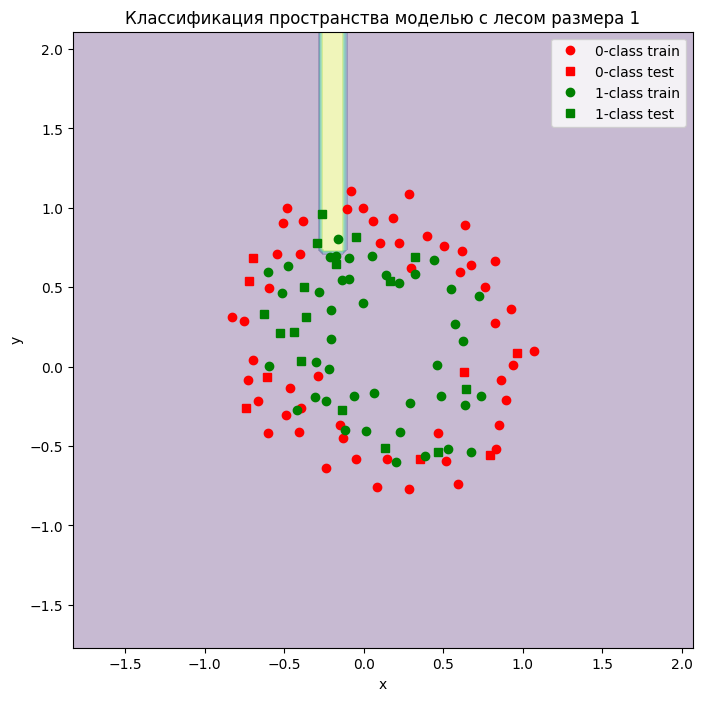

Размер леса:  1 
Точность:  0.5254237288135594


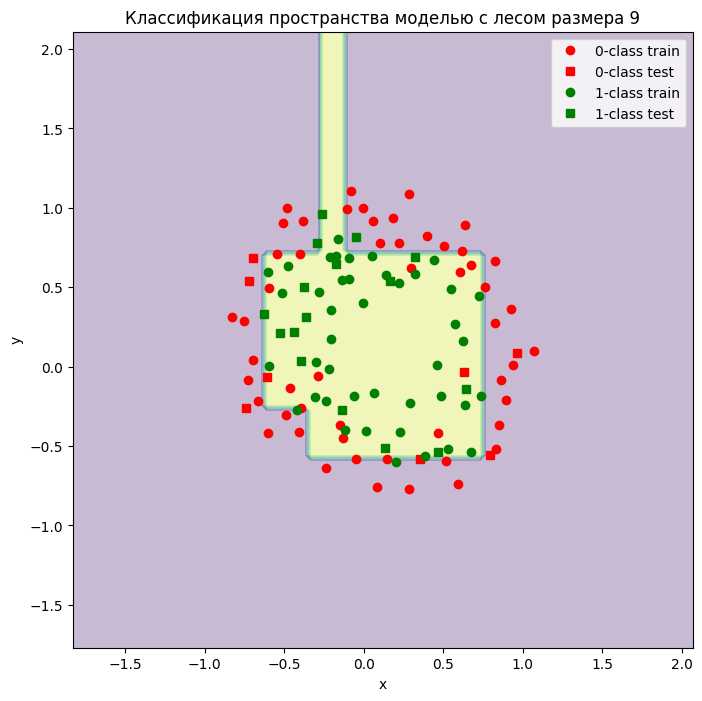

Размер леса:  9 
Точность:  0.8728813559322034


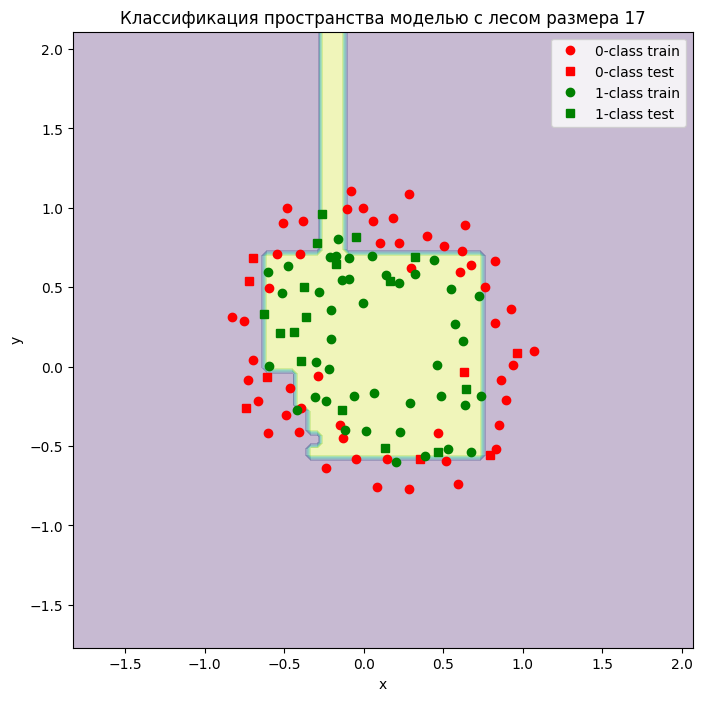

Размер леса:  17 
Точность:  0.8898305084745762


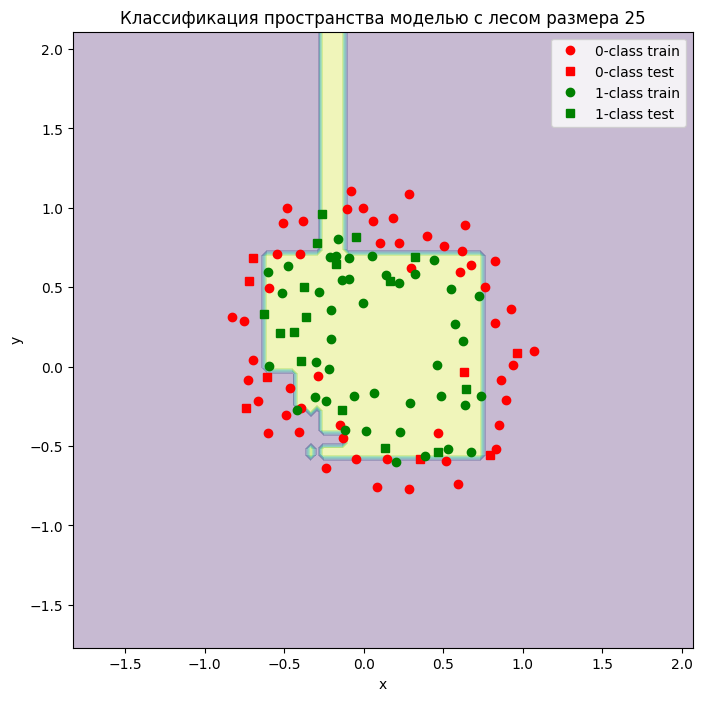

Размер леса:  25 
Точность:  0.8983050847457628


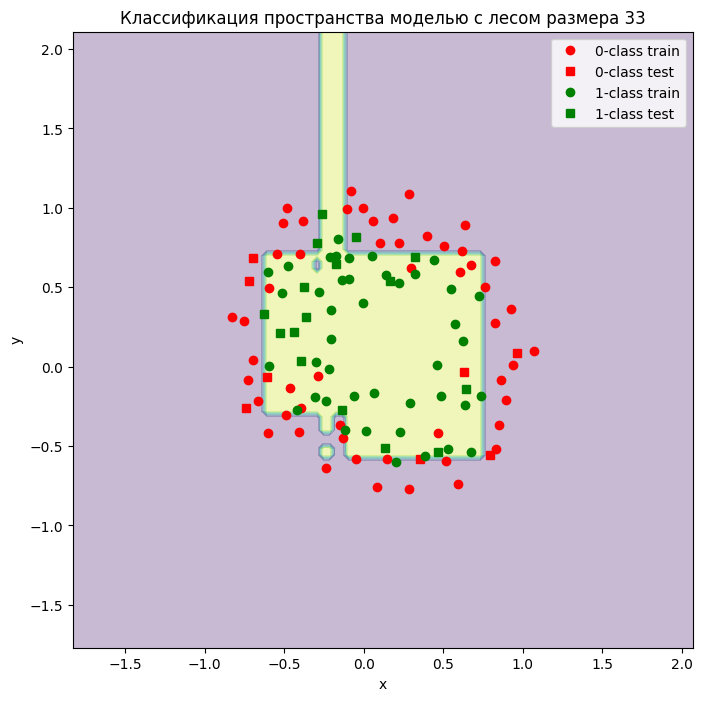

Размер леса:  33 
Точность:  0.9067796610169492


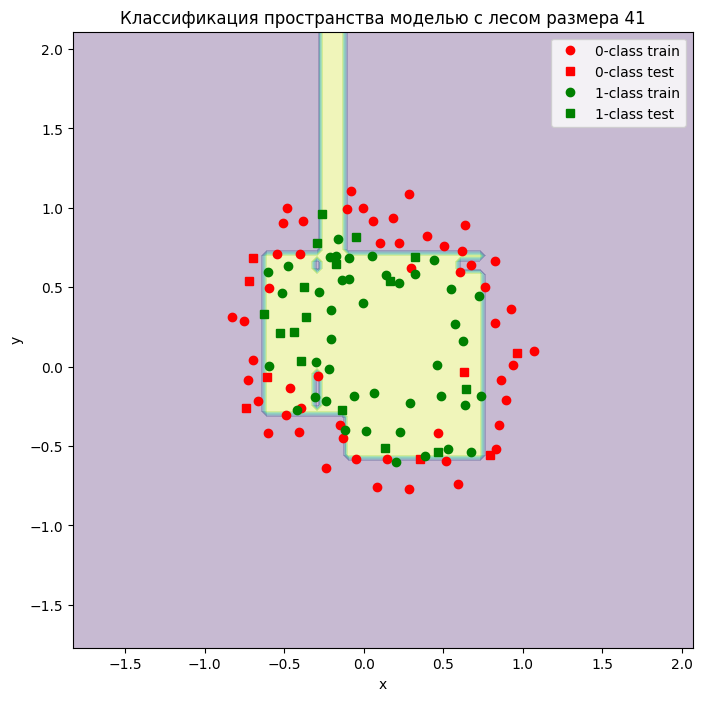

Размер леса:  41 
Точность:  0.9322033898305084


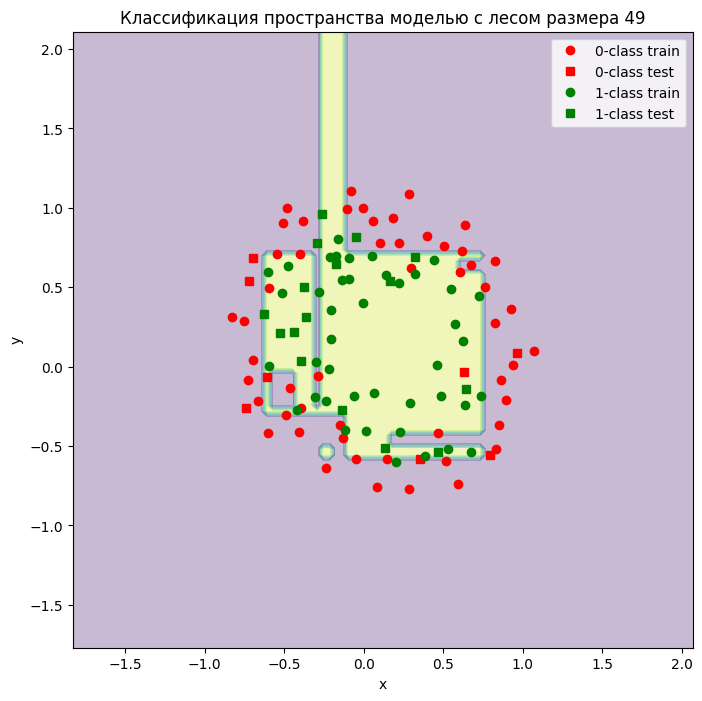

Размер леса:  49 
Точность:  0.9491525423728814


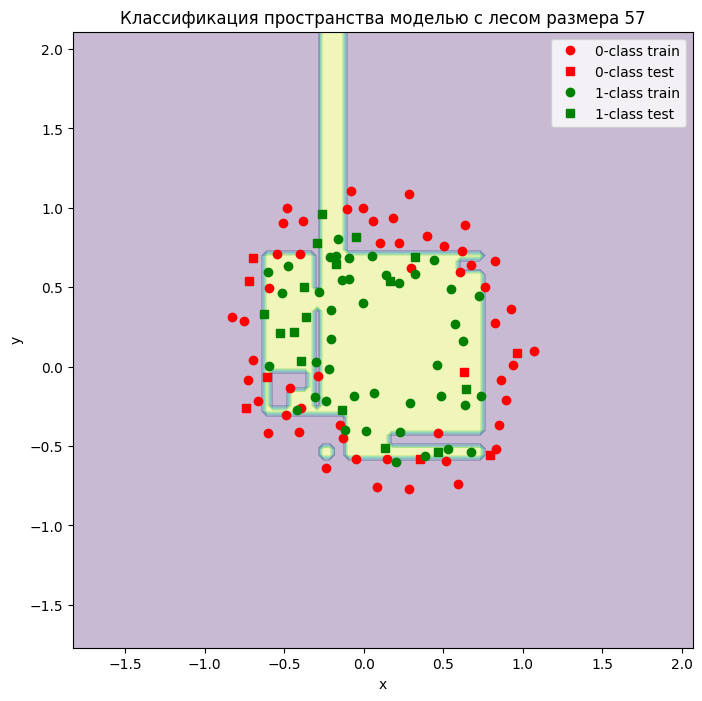

Размер леса:  57 
Точность:  0.9491525423728814


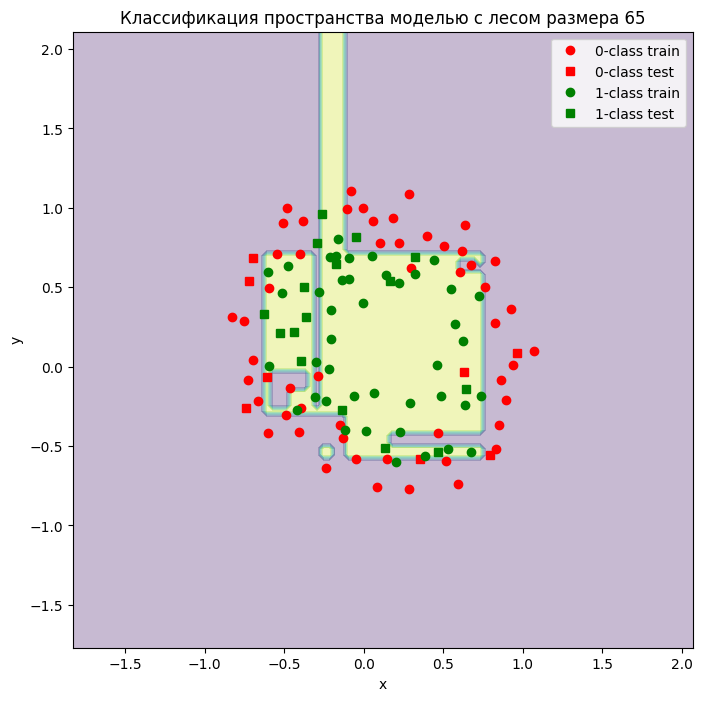

Размер леса:  65 
Точность:  0.9491525423728814


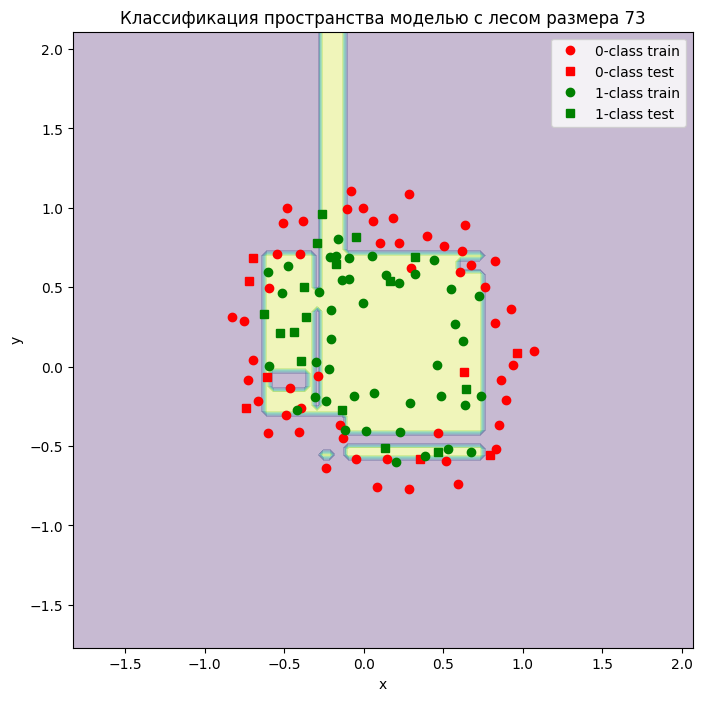

Размер леса:  73 
Точность:  0.9576271186440678


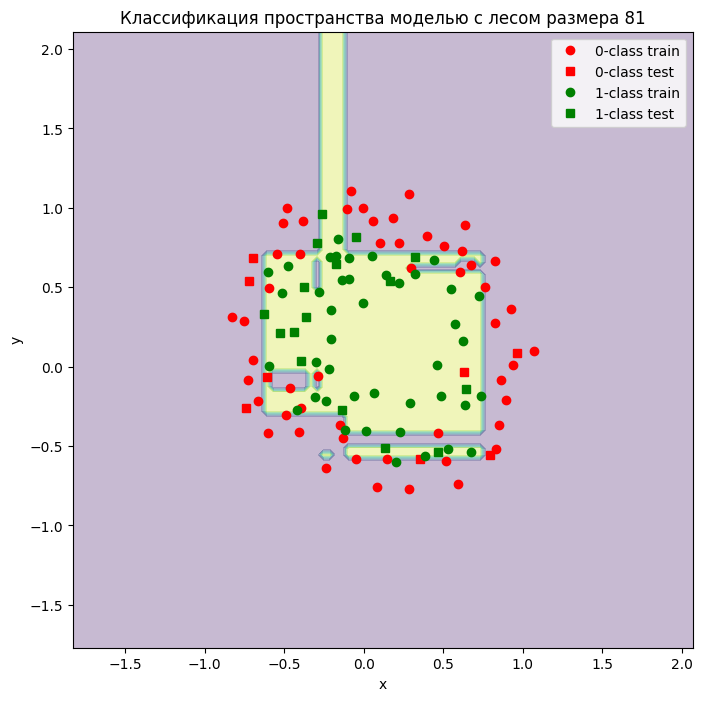

Размер леса:  81 
Точность:  0.9661016949152542


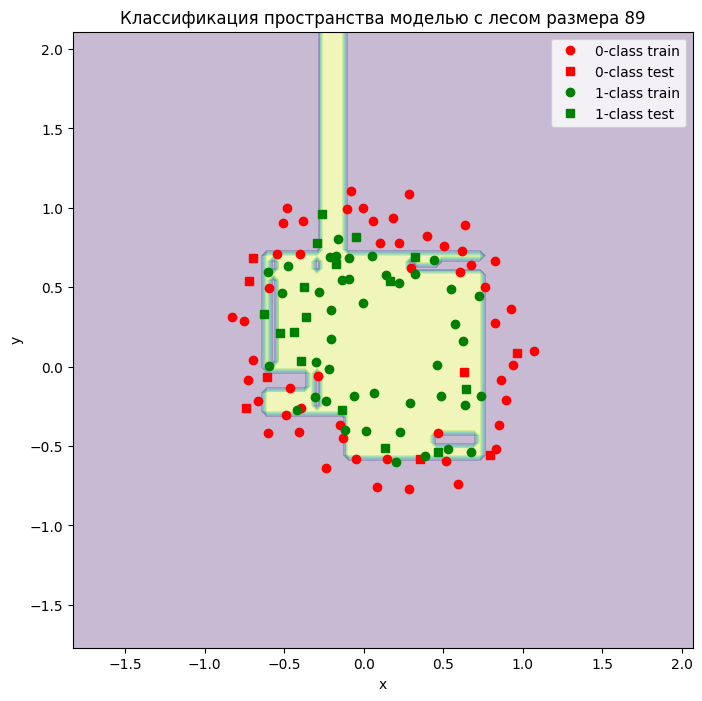

Размер леса:  89 
Точность:  0.9745762711864406


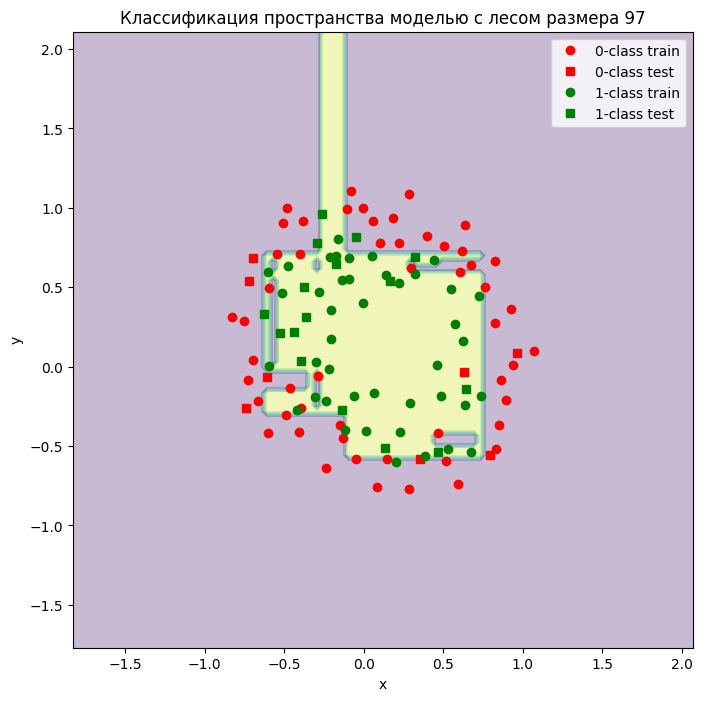

Размер леса:  97 
Точность:  0.9745762711864406


In [168]:
for trees in range(1, 100, 8):
  model = GradientBoostingClassifier(n_estimators=trees, learning_rate=0.1).fit(train_attrs, train_target)
 
  display = DecisionBoundaryDisplay.from_estimator(model, df_attr, response_method='predict', alpha=0.3)
  plt.plot(zero_train['x'], zero_train['y'], 'ro', label='0-class train')
  plt.plot(zero_test['x'], zero_test['y'], 'rs', label='0-class test')
  plt.plot(one_train['x'], one_train['y'], 'go', label='1-class train')
  plt.plot(one_test['x'], one_test['y'], 'gs', label='1-class test')
  plt.title('Классификация пространства моделью с лесом размера ' + str(trees))
  plt.legend()
  plt.show()

  predict = model.predict(df_attr)
  print('Размер леса: ', trees, '\nТочность: ', metrics.accuracy_score(df_target, predict))